# Evaluación 2: Análisis de datos multivariantes

> Requiere cargar el archivo ["ProbDormir_110519.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/ProbDormir_110519.sav) en el repositorio local.

En esta evaluación vamos a trabajar con los datos de una investigación sobre problemas para conciliar y mantener el sueño. En dicho estudio se realizaron mediciones de variables psicológicas así como una estimación subjetiva del estado de salud mediante escalas de autorreporte. En todas las mediciones y la estimación del estado de salud, mayor puntaje representó mayor grado de la condición o estado estudiados.

In [ ]:
!pip install pyreadstat
!pip install pingouin
!pip install missingno
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/ProbDormir_110519.sav

In [1]:
import pandas as pd

df = pd.read_spss("ProbDormir_110519.sav")
df.drop(df.columns[[8, 11, 12, 13, 14]], axis=1, inplace=True)
df.head()

,id,ProbDorm,Sexo,Edad,Estres,Ansiedad,Depresion,PromHS,DifMantSueño,Salud
0,1,1,0,40.0,5.0,7.0,3.0,7.0,1,6.0
1,2,1,1,26.0,8.0,6.0,1.0,7.0,0,8.0
2,3,0,1,19.0,2.0,3.0,1.0,8.0,0,9.0
3,4,0,1,35.0,2.0,1.0,2.0,8.0,0,7.0
4,5,0,1,35.0,8.0,2.0,5.0,6.0,0,5.0


## Parte 1: Preprocesamiento de datos

1. Examina la cantidad de casos perdidos en cada variable. ¿Considerarías descartar alguna de las variables por la proporción de casos perdidos que presenta? (2 pts)
>Sugerencia: Utiliza la función `bar` disponible en el paquete `missingno`.

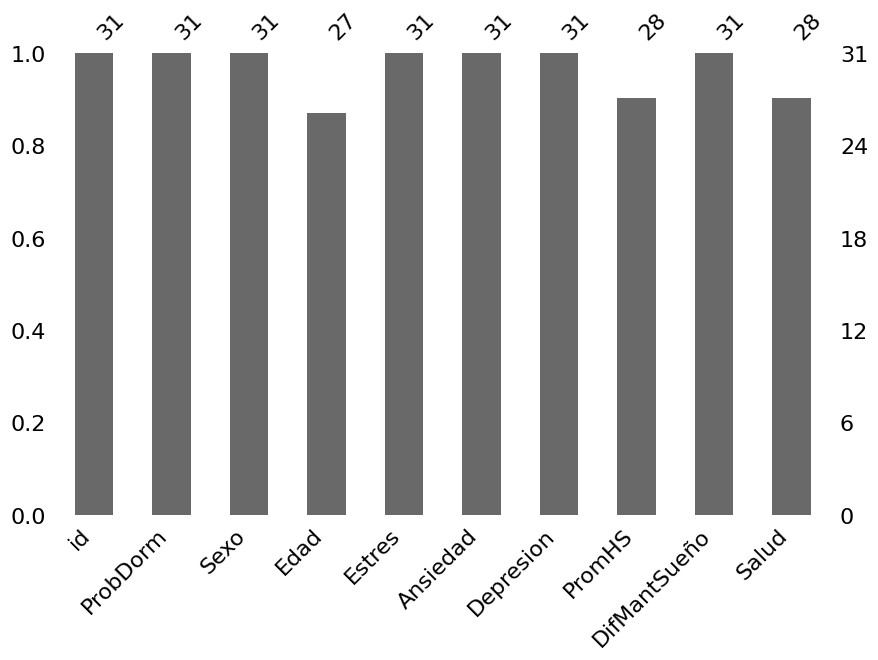

In [2]:
import missingno as msno

# Escribe tu respuesta aquí
msno.bar(df, figsize=(10, 6));

En este caso no se considera descartar variables por la cantidad de casos perdidos. Si bien `Edad` cuentan con poco más del 10% de casos perdidos, la cantidad de datos faltantes no es excesiva (alrededor del 50%). Por tanto, puede optarse por conservar esta variable contemplando la cantidad de información que se perdería si se decidiese descartarla. 

Correspondería, entonces, proceder a imputar los datos perdidos empleando un método apropiado, el cual va a depender de si existe un patrón aleatorio en los datos perdidos.

2. Visualiza los casos perdidos de todas las variables a la vez. ¿Observas algún patrón entre los datos perdidos o se trata de datos perdidos aleatoriamente? Si consideras que existe un patrón, realiza análisis posteriores para comprobarlo (2 pts).
>Sugerencia: Utiliza la función `matrix` disponible en el paquete `missingno`.

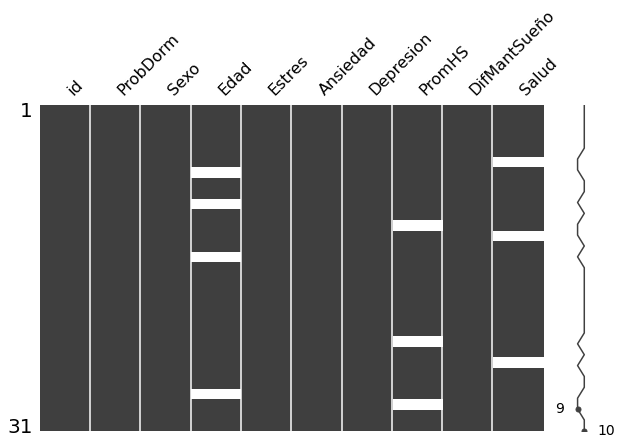

In [97]:
# Escribe tu respuesta aquí
msno.matrix(df, figsize=(10, 6));

En este caso no se observa un patrón en los datos perdidos. A simple vista puede apreciarse que no existe una co-ocurrencia entre los casos perdidos de las variables `Edad`, `PromHS` y `Salud`. Se trata de un caso de datos perdidos completamente al azar (MCAR), lo cual puede ser confirmado con la prueba de Little. 

3. Imputa los datos faltantes usando una técnica apropiada y crea una variable `df_impute` con los datos reconstruidos. Justifica tu selección de la técnica de imputación (2 pts). 

In [98]:
df_impute = df.transform(lambda x: x.fillna(x.mean(numeric_only=True)))
df_impute

,id,ProbDorm,Sexo,Edad,Estres,Ansiedad,Depresion,PromHS,DifMantSueño,Salud
0,1,1,0,40.000000,5.0,7.0,3.0,7.000000,1,6.000000
1,2,1,1,26.000000,8.0,6.0,1.0,7.000000,0,8.000000
2,3,0,1,19.000000,2.0,3.0,1.0,8.000000,0,9.000000
3,4,0,1,35.000000,2.0,1.0,2.0,8.000000,0,7.000000
4,5,0,1,35.000000,8.0,2.0,5.0,6.000000,0,5.000000
5,6,1,0,40.000000,10.0,4.0,7.0,7.000000,1,7.428571
6,7,0,0,39.148148,8.0,4.0,0.0,7.000000,0,9.000000
7,8,0,0,33.000000,2.0,9.0,2.0,6.000000,0,5.000000
8,9,1,1,32.000000,8.0,9.0,3.0,8.000000,1,9.000000
9,10,1,0,39.148148,8.0,11.0,6.0,8.000000,1,10.000000


Dado que se trata de datos MCAR puede optarse por métodos sencillos de imputación. En este caso se optó por imputar los casos perdidos utilizando la media de cada variable.  

4. Emplea la distancia de Mahalanobis para examinar si existen potenciales outliers en las variables cuantitativas de `df_impute`. ¿Qué puedes concluir? (2 pts)

In [113]:
from sklearn.covariance import MinCovDet
import numpy as np

# Los datos con los que trabajamos
data = df_impute[
    ["Edad", "Estres", "Ansiedad", "Depresion", "PromHS", "Salud"]
]

# Calculamos la distancia de Mahalanobis
robust_cov = MinCovDet().fit(data)
D2 = robust_cov.mahalanobis(data)

# Calculamos la métrica D^2/df
D2_df = D2 / data.shape[1]

print(np.where(D2_df > 2.5))

(array([ 4,  5,  7,  9, 11, 15, 16, 17, 18, 19, 21, 27]),)


La prueba inferencial basada en la distancia de Mahalanobis indica la presencia de 12 potenciales outliers. Estos deben ser contrastados con una examinación univariada y bivariada de los datos para confirmar si en efecto se trata de potenciales outliers. Posteriormente, los investigadores a cargo deben evaluar si los potenciales outliers realmente lo son y decidir cómo tratarlos. 

## Parte 2: Verificación de supuestos

5. Asumiendo que se trata de una variable cuantitativa continua, analiza la normalidad de la variable `Edad` utilizando un Q-Q Plot y una prueba inferencial. ¿Qué puedes concluir en relación a la normalidad de dicha variable? (2 pts)
>Sugerencia: Utiliza las funciones `qqplot` y `normality` disponibles en el paquete `pingouin`.

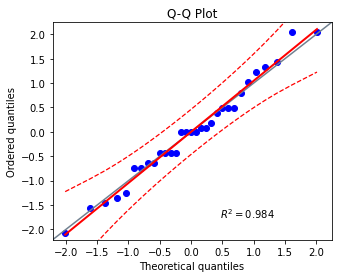

In [118]:
import pingouin as pg

# Escribe tu respuesta aquí
pg.qqplot(df_impute["Edad"], dist="norm");

In [119]:
pg.normality(df_impute["Edad"], method="shapiro")

,W,pval,normal
Edad,0.980161,0.817179,True


En base a los métodos gráfico e inferencial podemos concluir que la variable Edad se aproxima a una distribución normal. En el caso del Q-Q Plot podemos observar que los datos (puntos azules) no se alejan demasiado de la distribución normal (línea diagonal roja). Por otra parte, la prueba de Shapiro-Wilk no nos permite rechazar la hipótesis nula que plantea que `Edad` se asemeja a una distribución normal. 

6. Asumiendo que se trata de variables cuantitativas continuas, analiza gráficamente la homocedasticidad de las variables `Edad` y `Ansiedad`. ¿Qué puedes concluir en relación a la homogeneidad de las varianzas entre ambas variables? (2 pts)

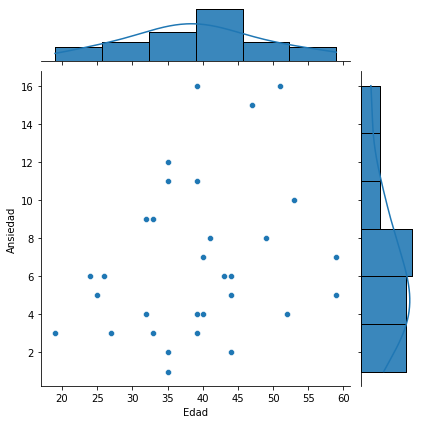

In [120]:
import seaborn as sns

# Escribe tu respuesta aquí
ax = sns.jointplot(x="Edad", y="Ansiedad", data=df_impute)
ax.plot_marginals(sns.histplot, kde=True);

Las varianzas de las variables `Edad` y `Ansiedad` no son homogéneas. Esto debido a que en el gráfico podemos observar diferentes niveles de dispersión en la variable `Ansiedad` según los diferentes valores de la variable `Edad`. La falta de homogeneidad se da principalmente por la marcada asimetría de la variable Ansiedad.